### StarAgile Assignment on ML Level 1 - Assignment 4 (Clustering)
#### Spotify Music Recommendation System
#### Assignment Submitted by VINAY.M on 09-09-2023

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Data
df = pd.read_csv("dataset.csv")

In [3]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
# dropping Unnamed, track_id, explicit, mode, 'time_signature', 'duration_ms'
df.drop(['Unnamed: 0','track_id','explicit', 'mode','time_signature', 'duration_ms'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   danceability      114000 non-null  float64
 5   energy            114000 non-null  float64
 6   key               114000 non-null  int64  
 7   loudness          114000 non-null  float64
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  track_genre       114000 non-null  object 
dtypes: float64(9), int64(2), object(4)
memory usage: 13.0+ MB


In [7]:
df.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
track_genre         0
dtype: int64

In [8]:
#Dropping Null rows
df.dropna(inplace = True)

In [9]:
# Dropping Duplicated Row
dup = df.duplicated().sum()
print(dup)
df.drop_duplicates(inplace=True)

577


In [10]:
df.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
track_genre         0
dtype: int64

In [11]:
# Checking Cardinality
df.nunique().sort_index()

acousticness         5061
album_name          46589
artists             31437
danceability         1174
energy               2083
instrumentalness     5346
key                    12
liveness             1722
loudness            19480
popularity            101
speechiness          1489
tempo               45652
track_genre           114
track_name          73608
valence              1790
dtype: int64

In [ ]:
# Understanding Track's Audio Features

In [12]:
# Descriptive Statistics of Numerial Columns
df.describe()

,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000
mean,33.359674,0.567113,0.642174,5.309332,-8.242913,0.084697,0.314075,0.155802,0.213610,0.474239,122.176181
std,22.269626,0.173402,0.251031,3.559767,5.011931,0.105803,0.331943,0.309314,0.190481,0.259239,29.972104
min,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.456000,0.473000,2.000000,-9.998000,0.035900,0.016800,0.000000,0.098000,0.260000,99.299000
50%,35.000000,0.580000,0.685000,5.000000,-6.996000,0.048900,0.168000,0.000041,0.132000,0.464000,122.019000
75%,50.000000,0.695000,0.854000,8.000000,-5.001000,0.084575,0.596000,0.048700,0.273000,0.683000,140.073000
max,100.000000,0.985000,1.000000,11.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


In [13]:
# Descriptive Statistics of Categorical
df.describe(include=["O"])

,artists,album_name,track_name,track_genre
count,113422,113422,113422,113422
unique,31437,46589,73608,114
top,The Beatles,Feliz Cumpleaños con Perreo,Run Rudolph Run,acoustic
freq,279,180,151,1000


<Axes: >

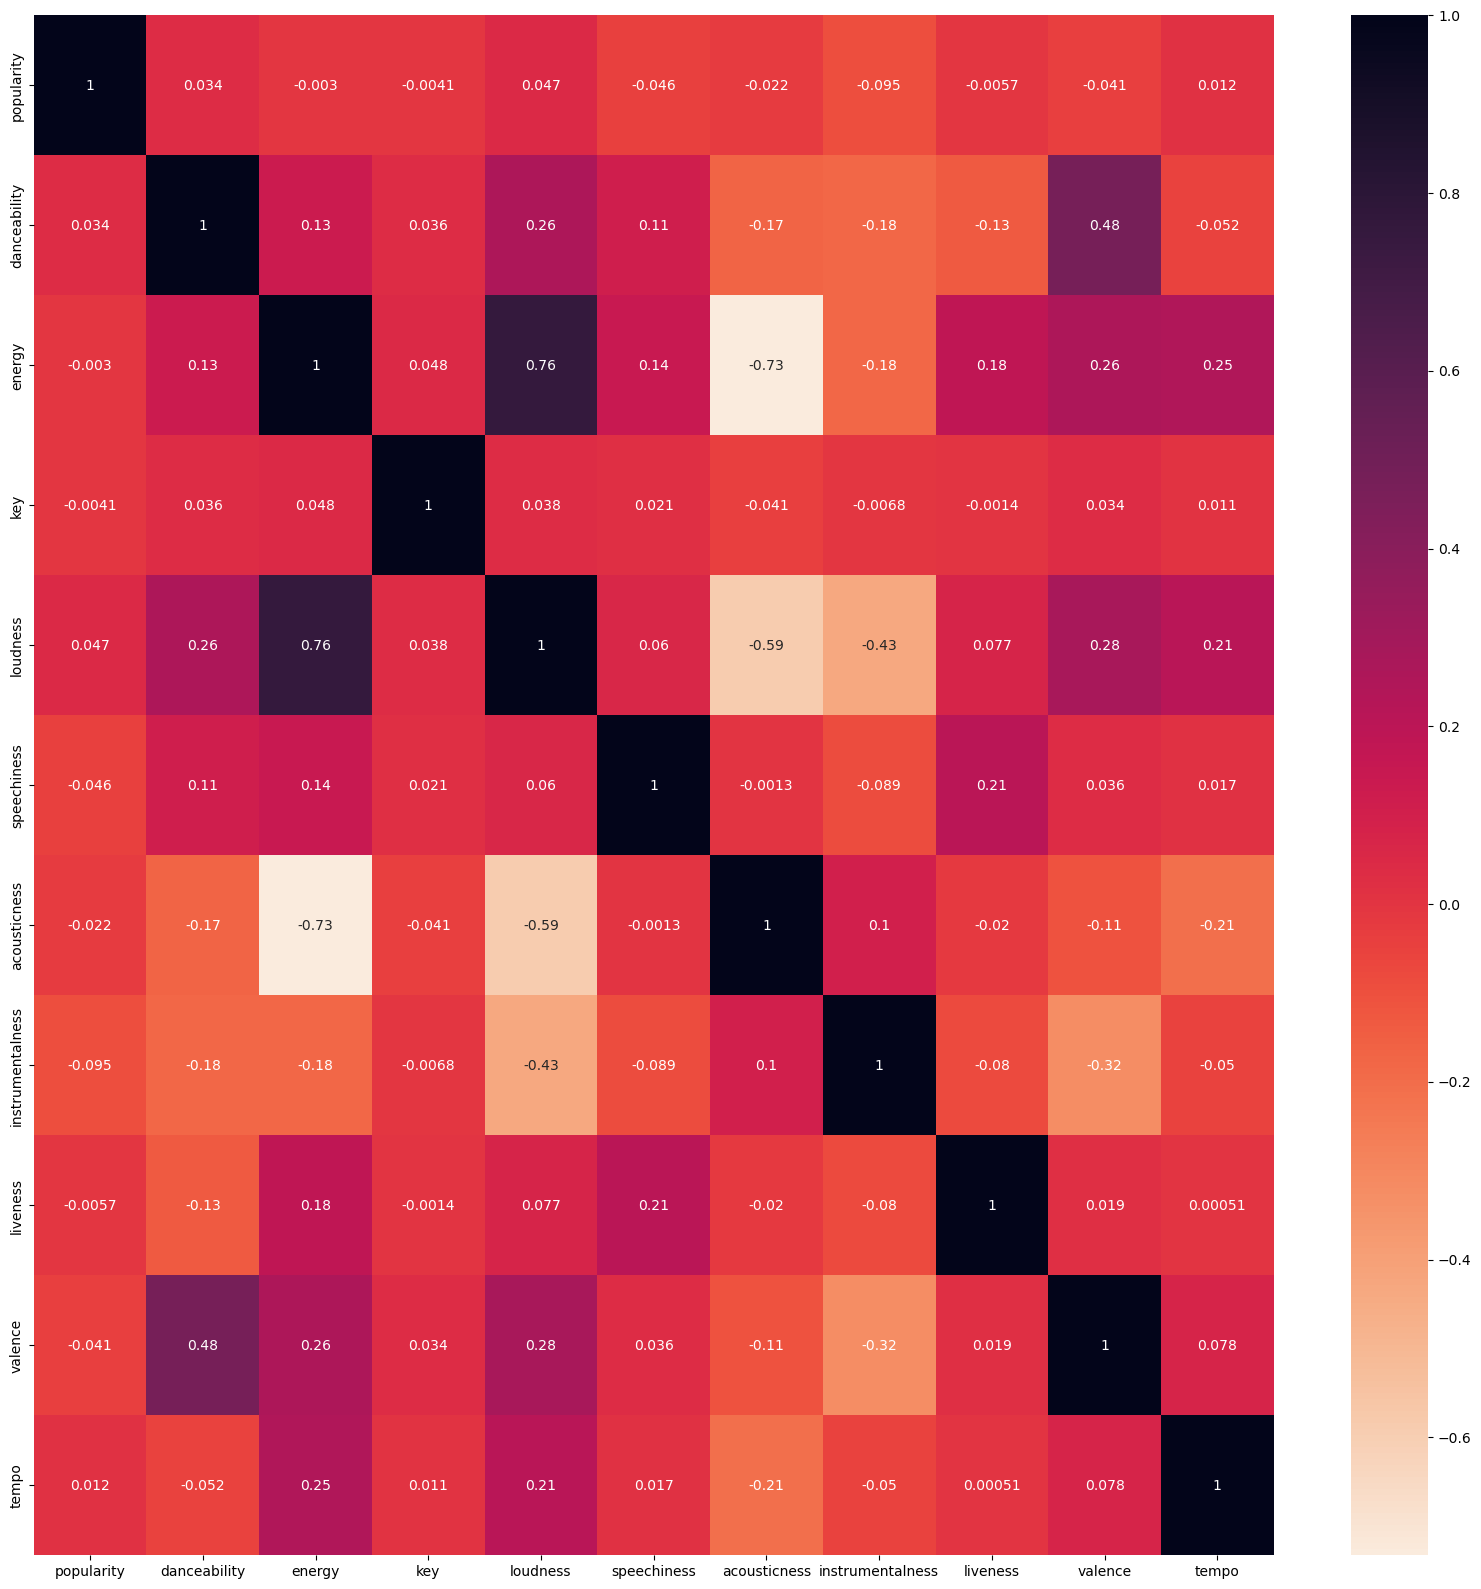

In [14]:
# Correlation between numerical columns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="rocket_r")

In [ ]:
# Feature Engineering

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
dfNew = df.copy(deep = True)
# List of Columns to be Standardised
cols_to_standardise = []
for col in dfNew.select_dtypes(include=[int, float]).columns:
    cols_to_standardise.append(col)
cols_to_standardise

['popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [17]:
#Scaling
scaler = StandardScaler()
dfNew[cols_to_standardise] = scaler.fit_transform(dfNew[cols_to_standardise])

In [18]:
dfNew

,artists,album_name,track_name,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,Gen Hoshino,Comedy,Comedy,1.780025,0.627949,-0.721723,-1.210571,0.298671,0.551056,-0.849169,-0.503701,0.758030,0.928727,-1.143041,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.971746,-0.848393,-1.896881,-1.210571,-1.794144,-0.079366,1.837447,-0.503686,-0.591193,-0.799417,-1.490966,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,1.061555,-0.744588,-1.128049,-1.491490,-0.297509,-0.274069,-0.313533,-0.503704,-0.507195,-1.366465,-1.529568,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,1.690217,-1.736505,-2.320735,-1.491490,-2.049536,-0.457431,1.780208,-0.503475,-0.428446,-1.277743,1.987317,acoustic
4,Chord Overstreet,Hold On,Hold On,2.184165,0.293465,-0.793428,-0.929652,-0.286934,-0.303369,0.466725,-0.503704,-0.686216,-1.185164,-0.074309,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,-0.555004,-2.278600,-1.622014,-0.086897,-1.626144,-0.401666,0.981875,2.496500,-0.668366,-1.698592,0.127413,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,-0.510099,-2.267066,-2.092077,-1.491490,-2.010229,-0.421514,2.048327,2.651683,-0.570193,-1.694349,-1.232391,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,-0.510099,0.356902,-1.247557,-1.491490,-0.529157,-0.403556,1.665730,-0.503704,-0.680966,1.036736,0.340379,world-music
113998,Michael W. Smith,Change Your World,Friends,0.343084,0.114689,-0.542462,0.474940,-0.527960,-0.519811,0.201618,-0.503704,0.296039,-0.236227,0.459890,world-music


In [19]:
df

,artists,album_name,track_name,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,Gen Hoshino,Comedy,Comedy,73,0.676,0.4610,1,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,0.420,0.1660,1,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0.438,0.3590,0,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,acoustic
4,Chord Overstreet,Hold On,Hold On,82,0.618,0.4430,2,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,0.172,0.2350,5,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,0.174,0.1170,0,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,0.629,0.3290,0,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,world-music
113998,Michael W. Smith,Change Your World,Friends,41,0.587,0.5060,7,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,world-music


In [20]:
# Picking only the numerical columns to make clustering
X = dfNew[cols_to_standardise]

In [21]:
X

,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.780025,0.627949,-0.721723,-1.210571,0.298671,0.551056,-0.849169,-0.503701,0.758030,0.928727,-1.143041
1,0.971746,-0.848393,-1.896881,-1.210571,-1.794144,-0.079366,1.837447,-0.503686,-0.591193,-0.799417,-1.490966
2,1.061555,-0.744588,-1.128049,-1.491490,-0.297509,-0.274069,-0.313533,-0.503704,-0.507195,-1.366465,-1.529568
3,1.690217,-1.736505,-2.320735,-1.491490,-2.049536,-0.457431,1.780208,-0.503475,-0.428446,-1.277743,1.987317
4,2.184165,0.293465,-0.793428,-0.929652,-0.286934,-0.303369,0.466725,-0.503704,-0.686216,-1.185164,-0.074309
...,...,...,...,...,...,...,...,...,...,...,...
113995,-0.555004,-2.278600,-1.622014,-0.086897,-1.626144,-0.401666,0.981875,2.496500,-0.668366,-1.698592,0.127413
113996,-0.510099,-2.267066,-2.092077,-1.491490,-2.010229,-0.421514,2.048327,2.651683,-0.570193,-1.694349,-1.232391
113997,-0.510099,0.356902,-1.247557,-1.491490,-0.529157,-0.403556,1.665730,-0.503704,-0.680966,1.036736,0.340379
113998,0.343084,0.114689,-0.542462,0.474940,-0.527960,-0.519811,0.201618,-0.503704,0.296039,-0.236227,0.459890


In [ ]:
#X.hist(figsize=(25,25));

In [22]:
wcss=[]
for i in range(1,21):
    print(i)
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
[1247642.0000000026, 1028841.4271754758, 938847.485859887, 869885.1297963177, 806873.975619925, 755840.9278354065, 707286.9366052558, 667424.0800631964, 642300.9535654075, 618918.3565752606, 603141.8774242041, 587609.2304035899, 573890.8113992683, 560296.2336285042, 549383.954846768, 538645.3628393691, 527698.7328726059, 518931.97954385914, 510526.9716353911, 503161.76420201815]


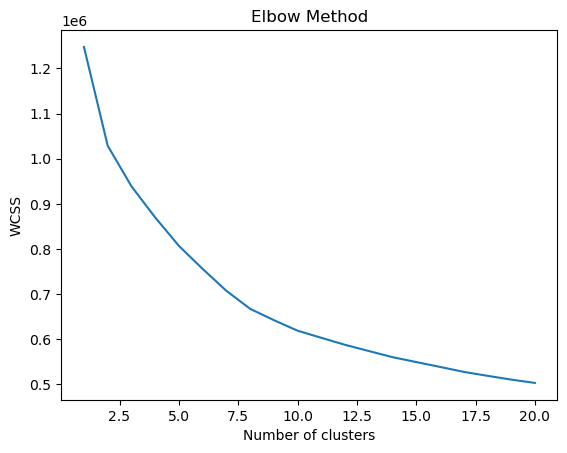

In [23]:
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
selected_clusters = 8
clusters = KMeans(selected_clusters, random_state=42)
#pred_y =clusters_new.fit(df_analysis) #old
pred_y =clusters.fit_predict(X) #newline

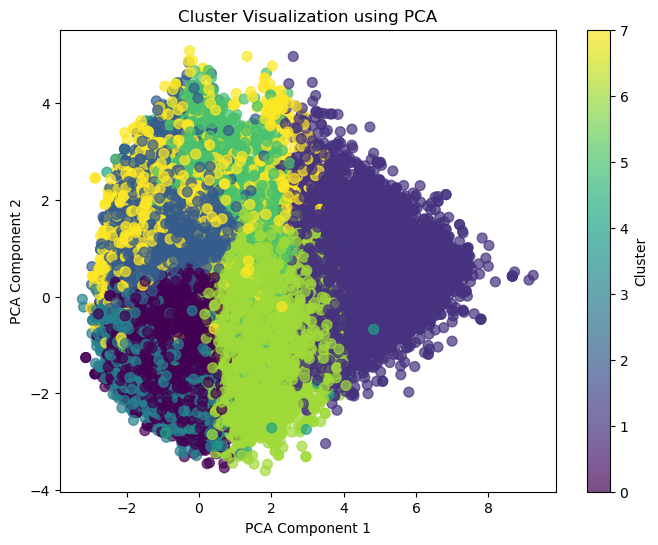

In [25]:
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=pred_y, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization using PCA')
plt.colorbar(label='Cluster')
plt.show()

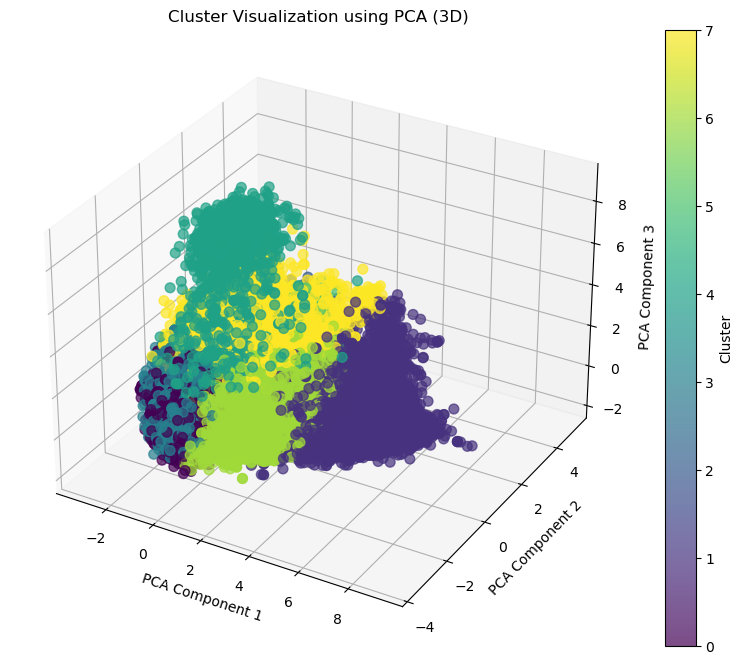

In [26]:
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Apply PCA to reduce data to 3 dimensions for visualization
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X)

# Create a 3D scatter plot to visualize the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with the reduced data
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=pred_y, cmap='viridis', s=50, alpha=0.7)

# Label axes
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Title
ax.set_title('Cluster Visualization using PCA (3D)')

# Add a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster')

plt.show()

In [27]:
for i in np.unique(clusters.labels_):
    print(i)

0
1
2
3
4
5
6
7


In [28]:
# Creating a new copy of dataframe and adding the cluster labels
df_std_clustered = dfNew.copy(deep=True)
df_std_clustered['Cluster'] = clusters.labels_
df_std_clustered

,artists,album_name,track_name,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,Cluster
0,Gen Hoshino,Comedy,Comedy,1.780025,0.627949,-0.721723,-1.210571,0.298671,0.551056,-0.849169,-0.503701,0.758030,0.928727,-1.143041,acoustic,0
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.971746,-0.848393,-1.896881,-1.210571,-1.794144,-0.079366,1.837447,-0.503686,-0.591193,-0.799417,-1.490966,acoustic,6
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,1.061555,-0.744588,-1.128049,-1.491490,-0.297509,-0.274069,-0.313533,-0.503704,-0.507195,-1.366465,-1.529568,acoustic,6
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,1.690217,-1.736505,-2.320735,-1.491490,-2.049536,-0.457431,1.780208,-0.503475,-0.428446,-1.277743,1.987317,acoustic,6
4,Chord Overstreet,Hold On,Hold On,2.184165,0.293465,-0.793428,-0.929652,-0.286934,-0.303369,0.466725,-0.503704,-0.686216,-1.185164,-0.074309,acoustic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,-0.555004,-2.278600,-1.622014,-0.086897,-1.626144,-0.401666,0.981875,2.496500,-0.668366,-1.698592,0.127413,world-music,1
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,-0.510099,-2.267066,-2.092077,-1.491490,-2.010229,-0.421514,2.048327,2.651683,-0.570193,-1.694349,-1.232391,world-music,1
113997,Cesária Evora,Best Of,Miss Perfumado,-0.510099,0.356902,-1.247557,-1.491490,-0.529157,-0.403556,1.665730,-0.503704,-0.680966,1.036736,0.340379,world-music,6
113998,Michael W. Smith,Change Your World,Friends,0.343084,0.114689,-0.542462,0.474940,-0.527960,-0.519811,0.201618,-0.503704,0.296039,-0.236227,0.459890,world-music,6


In [29]:
# Creating a new copy of dataframe and adding the cluster labels
df_raw_clustered = df.copy(deep=True)
df_raw_clustered['Cluster'] = clusters.labels_
df_raw_clustered

,artists,album_name,track_name,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,Cluster
0,Gen Hoshino,Comedy,Comedy,73,0.676,0.4610,1,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,acoustic,0
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,0.420,0.1660,1,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,acoustic,6
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0.438,0.3590,0,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,acoustic,6
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,acoustic,6
4,Chord Overstreet,Hold On,Hold On,82,0.618,0.4430,2,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,acoustic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,0.172,0.2350,5,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,world-music,1
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,0.174,0.1170,0,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,world-music,1
113997,Cesária Evora,Best Of,Miss Perfumado,22,0.629,0.3290,0,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,world-music,6
113998,Michael W. Smith,Change Your World,Friends,41,0.587,0.5060,7,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,world-music,6


In [30]:
# Cluster Analysis

In [31]:
# popularity mean by cluster
df_raw_clustered.groupby(['Cluster']).popularity.mean()

Cluster
0    55.711635
1    28.642281
2    34.980253
3    11.902241
4    25.030717
5    27.930729
6    32.955562
7    36.232722
Name: popularity, dtype: float64

In [32]:
df_raw_clustered['Cluster'].value_counts()

0    23987
3    22177
2    20155
6    20073
5    11419
7     7249
1     7190
4     1172
Name: Cluster, dtype: int64

In [33]:
df_raw_clustered[df_raw_clustered['Cluster']==0].describe()

,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Cluster
count,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.0
mean,55.711635,0.670598,0.693817,5.419977,-6.569348,0.084108,0.213579,0.018587,0.163666,0.584511,114.792956,0.0
std,13.236265,0.115906,0.151622,3.572101,2.492678,0.083420,0.210711,0.073662,0.101844,0.215826,23.598452,0.0
min,24.000000,0.261000,0.146000,0.000000,-20.343000,0.022100,0.000003,0.000000,0.011400,0.030100,48.578000,0.0
25%,45.000000,0.591000,0.583000,2.000000,-8.011500,0.035700,0.032300,0.000000,0.092200,0.425000,96.036000,0.0
50%,55.000000,0.673000,0.701000,6.000000,-6.259000,0.049800,0.142000,0.000003,0.124000,0.590000,114.370000,0.0
75%,65.000000,0.751000,0.813000,9.000000,-4.820500,0.089000,0.348000,0.000386,0.215000,0.756000,129.033000,0.0
max,100.000000,0.980000,0.998000,11.000000,1.821000,0.565000,0.975000,0.941000,0.624000,0.994000,208.038000,0.0


In [35]:
cluster_info=[]
for i in range(0, selected_clusters):
    cluster_info.append(df_raw_clustered[df_raw_clustered['Cluster']==i].describe().iloc[1,:])
    print(cluster_info[i].sort_values())
    print()

loudness             -6.569348
Cluster               0.000000
instrumentalness      0.018587
speechiness           0.084108
liveness              0.163666
acousticness          0.213579
valence               0.584511
danceability          0.670598
energy                0.693817
key                   5.419977
popularity           55.711635
tempo               114.792956
Name: mean, dtype: float64

loudness            -21.249868
speechiness           0.050727
liveness              0.162169
energy                0.169809
valence               0.183670
danceability          0.345574
instrumentalness      0.793607
acousticness          0.864575
Cluster               1.000000
key                   4.850209
popularity           28.642281
tempo               102.972653
Name: mean, dtype: float64

loudness             -5.247609
instrumentalness      0.041146
acousticness          0.073093
speechiness           0.089566
liveness              0.202142
valence               0.363776
danceability  

In [36]:
# Creating a mean summary dictionary and classify it
cluster_info_dict = {}
for col, val in enumerate(cluster_info):
    cluster_info_dict[f'Cluster {col}'] = val.to_dict()
cluster_info_dict

{'Cluster 0': {'popularity': 55.71163546921249,
  'danceability': 0.6705981990244716,
  'energy': 0.6938171509567683,
  'key': 5.419977487805895,
  'loudness': -6.569347521574185,
  'speechiness': 0.08410752074040105,
  'acousticness': 0.21357905411222747,
  'instrumentalness': 0.018587351707591612,
  'liveness': 0.16366566473506486,
  'valence': 0.5845113311376996,
  'tempo': 114.79295622628923,
  'Cluster': 0.0},
 'Cluster 1': {'popularity': 28.642280945757996,
  'danceability': 0.34557354659248957,
  'energy': 0.1698093831015299,
  'key': 4.850208623087622,
  'loudness': -21.249868289290685,
  'speechiness': 0.05072735744089013,
  'acousticness': 0.8645747326954104,
  'instrumentalness': 0.7936073612531293,
  'liveness': 0.16216888734353266,
  'valence': 0.1836700112656467,
  'tempo': 102.9726528511822,
  'Cluster': 1.0},
 'Cluster 2': {'popularity': 34.98025303894815,
  'danceability': 0.4414790473827834,
  'energy': 0.8299910195981146,
  'key': 5.241776234185066,
  'loudness': -5.

In [ ]:
# Categorising the Dictionary

In [37]:
totalcluster = len(cluster_info_dict)

In [38]:
Categorised = []
for i in range(totalcluster):
    temp = cluster_info_dict[f'Cluster {i}']
    try:
        if temp['danceability'] >= 0.5:
            temp['danceability'] = "Most Danceable"
        else:
            temp['danceability'] = "Least Danceable"

        if temp['energy'] >= 0.5:
            temp['energy'] = "Energetic"
        else:
            temp['energy'] = "Non Energetic"

        if temp['loudness'] >= -60 and temp['loudness'] < -40:
            temp['loudness'] = "Quite"
        elif temp['loudness'] >= -40 and temp['loudness'] < -20:
            temp['loudness'] = "Mild"
        else:
            temp['loudness'] = "Loud"

        if temp['speechiness'] > 0.66:
            temp['speechiness'] = "Spoken Words"
        elif temp['speechiness'] >= 0.33 and temp['speechiness'] <= 0.66:  
            temp['speechiness'] = "Music and Speech"
        else:
            temp['speechiness'] = "Music"

        if temp['acousticness'] >= 0.5:
            temp['acousticness'] = "Mostly Acoustic"
        else:
            temp['acousticness'] = "Non Acoustic"

        if temp['instrumentalness'] >= 0.5:
            temp['instrumentalness'] = "Instrumental"
        else:
            temp['instrumentalness'] = "Vocal"

        if temp['liveness'] >= 0.8:
            temp['liveness'] = "Live Track"
        else:
            temp['liveness'] = "Studio Recorded"

        if temp['valence'] >= 0.5:
            temp['valence'] = "Happy, Cheerful, Euphoric"
        else:
            temp['valence'] = "Sad, Depressed, Angry"

        if temp['tempo'] >= 0.5:
            temp['tempo'] = "Speed"
        else:
            temp['tempo'] = "Slow Pace"
        Categorised.append(temp)
    except:
        pass

In [39]:
Categorised

[{'popularity': 55.71163546921249,
  'danceability': 'Most Danceable',
  'energy': 'Energetic',
  'key': 5.419977487805895,
  'loudness': 'Loud',
  'speechiness': 'Music',
  'acousticness': 'Non Acoustic',
  'instrumentalness': 'Vocal',
  'liveness': 'Studio Recorded',
  'valence': 'Happy, Cheerful, Euphoric',
  'tempo': 'Speed',
  'Cluster': 0.0},
 {'popularity': 28.642280945757996,
  'danceability': 'Least Danceable',
  'energy': 'Non Energetic',
  'key': 4.850208623087622,
  'loudness': 'Mild',
  'speechiness': 'Music',
  'acousticness': 'Mostly Acoustic',
  'instrumentalness': 'Instrumental',
  'liveness': 'Studio Recorded',
  'valence': 'Sad, Depressed, Angry',
  'tempo': 'Speed',
  'Cluster': 1.0},
 {'popularity': 34.98025303894815,
  'danceability': 'Least Danceable',
  'energy': 'Energetic',
  'key': 5.241776234185066,
  'loudness': 'Loud',
  'speechiness': 'Music',
  'acousticness': 'Non Acoustic',
  'instrumentalness': 'Vocal',
  'liveness': 'Studio Recorded',
  'valence': 'S

In [40]:
# Making Recommendations within the existing database

In [41]:
df_raw_clustered

,artists,album_name,track_name,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,Cluster
0,Gen Hoshino,Comedy,Comedy,73,0.676,0.4610,1,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,acoustic,0
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,0.420,0.1660,1,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,acoustic,6
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0.438,0.3590,0,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,acoustic,6
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,acoustic,6
4,Chord Overstreet,Hold On,Hold On,82,0.618,0.4430,2,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,acoustic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,0.172,0.2350,5,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,world-music,1
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,0.174,0.1170,0,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,world-music,1
113997,Cesária Evora,Best Of,Miss Perfumado,22,0.629,0.3290,0,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,world-music,6
113998,Michael W. Smith,Change Your World,Friends,41,0.587,0.5060,7,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,world-music,6


In [42]:
# Recommendations

In [43]:
# Randomly Pick Three Songs and Generate Recommendation for that

In [44]:
import random

In [45]:
random_row = df_raw_clustered.sample(n=3)

In [46]:
random_row

,artists,album_name,track_name,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,Cluster
31185,Swedish House Mafia;Sting,Larga Vida al Electro,Redlight,1,0.716,0.655,2,-5.999,0.0444,0.00857,0.162,0.0572,0.207,125.012,electro,3
49489,Coone;Da Tweekaz,Tweekay16 - The Ultimate Collection,D.W.X. (10 Years Dirty Workz Mix),23,0.537,0.952,0,-3.720,0.0676,0.00723,0.054,0.3070,0.335,149.955,hardstyle,2
86393,Cadena Perpetua,Malas Costumbres,De Más,43,0.560,0.922,7,-5.184,0.0638,0.08330,0.000,0.0799,0.856,149.790,punk,0


In [47]:
song_name = random_row["track_name"]
#print(song_name)
song_genre = random_row["track_genre"]
#print(song_genres)
query_songs = dict(zip(song_name, song_genre))
print(query_songs)

{'Redlight': 'electro', 'D.W.X. (10 Years Dirty Workz Mix)': 'hardstyle', 'De Más': 'punk'}


In [48]:
for song_name, song_genre in query_songs.items():
    print(f"Selected Song Name is:: {song_name} from the genre:: {song_genre}")

Selected Song Name is:: Redlight from the genre:: electro
Selected Song Name is:: D.W.X. (10 Years Dirty Workz Mix) from the genre:: hardstyle
Selected Song Name is:: De Más from the genre:: punk


In [49]:
from sklearn.metrics import pairwise_distances
recommended_songs = []
total_recommendation = 10
total_recommendation = total_recommendation+1
for song_name, song_genre in query_songs.items():
    cluster_id = df_raw_clustered.loc[df_raw_clustered['track_name'] == song_name, 'Cluster'].values[0] #extracts cluster number of perticular song
    #print(cluster_id)
    cluster_frame = df_raw_clustered[df_raw_clustered['Cluster'] == cluster_id] #creates a subset of songs based on selected song cluster
    #print(cluster_frame)
    genre_frame = cluster_frame[cluster_frame['track_genre'] == song_genre] #creates a subset of genres from perticular cluster
    #print(genre_frame)
    features = ['popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
    #popularity	danceability	energy loudness	speechiness	acousticness	instrumentalness	liveness	valence	tempo
    
    inputsongsFeature = genre_frame[genre_frame['track_name'] == song_name][features]
    
    
    distances = pairwise_distances(inputsongsFeature, genre_frame[features], metric='euclidean')[0]
    
    rec_indices = distances.argsort()[:total_recommendation]
    
    rec_songs = genre_frame.iloc[rec_indices]
    rec_songs = rec_songs[rec_songs['track_name'] != song_name] #Remove source source song name
    recommended_songs.append(rec_songs)

In [50]:
recommended_songs

[                                       artists  \
 31491                                Topic;A7S   
 31391  MEDUZA;James Carter;Elley Duhé;FAST BOY   
 31549                           Jax Jones;RAYE   
 31547                  Jax Jones;Years & Years   
 31397                          MEDUZA;Goodboys   
 31989                  La Roux;GAMPER & DADONI   
 31838                            Matoma;Brando   
 31449                                Topic;A7S   
 31498                                Topic;A7S   
 31431                                Topic;A7S   
 
                                  album_name                      track_name  \
 31491   EDM Gaming Music Autumn/Winter 2022    Kernkraft 400 (A Better Day)   
 31391                        Electro sounds                    Bad Memories   
 31549                 Larga Vida al Electro  You Don't Know Me - Radio Edit   
 31547               Queda poco para la PAES                            Play   
 31397                    Beats Elect

In [51]:
len(recommended_songs)

3

In [53]:
len_ = len(recommended_songs)

In [54]:
finalRecommendations = []
for i in range(len_):
    temp = recommended_songs[0][["artists","album_name","track_name"]]
    temp.columns = ["Recommended Artist", "Recommended Album", "Recommended Track"]
    temp.reset_index(drop=True, inplace=True)
    finalRecommendations.append(temp)

In [59]:
song_keys = list(query_songs.keys())
song_Genres = list(query_songs.values())
for i, df in enumerate(finalRecommendations):
    print(f'Top {total_recommendation-1} Genre under {song_Genres[i].upper()}')
    print(f'Current Song Playing :::: {song_keys[i].upper()} ::::')
    print(f'Current Song under the Cluster ::: {recommended_songs[i]["Cluster"].unique()}')
    #print(f'Cluster Recommendations {Categorised[recommended_songs[i]["Cluster"].unique()[0]]}') #error
    print(f'Cluster {recommended_songs[i]["Cluster"].unique()} Characteristics are :::: {Categorised[recommended_songs[i]["Cluster"].unique()[0]]}') #error
    print(f'Recommendations are ::::')
    display(df)

Top 10 Genre under ELECTRO
Current Song Playing :::: REDLIGHT ::::
Current Song under the Cluster ::: [3]
Cluster [3] Characteristics are :::: {'popularity': 11.902241060558236, 'danceability': 'Most Danceable', 'energy': 'Energetic', 'key': 5.594715245524642, 'loudness': 'Loud', 'speechiness': 'Music', 'acousticness': 'Non Acoustic', 'instrumentalness': 'Vocal', 'liveness': 'Studio Recorded', 'valence': 'Happy, Cheerful, Euphoric', 'tempo': 'Speed', 'Cluster': 3.0}
Recommendations are ::::


,Recommended Artist,Recommended Album,Recommended Track
0,Topic;A7S,EDM Gaming Music Autumn/Winter 2022,Kernkraft 400 (A Better Day)
1,MEDUZA;James Carter;Elley Duhé;FAST BOY,Electro sounds,Bad Memories
2,Jax Jones;RAYE,Larga Vida al Electro,You Don't Know Me - Radio Edit
3,Jax Jones;Years & Years,Queda poco para la PAES,Play
4,MEDUZA;Goodboys,Beats Electro Mood,Piece Of Your Heart
5,La Roux;GAMPER & DADONI,Hidden Gems,Bulletproof
6,Matoma;Brando,House Anthems,The Bender
7,Topic;A7S,Arbeitsmusik Herbst/Winter 2022/2023,Kernkraft 400 (A Better Day)
8,Topic;A7S,Ballermann Hits Party 2023,Kernkraft 400 (A Better Day)
9,Topic;A7S,Night Drive Autumn/Winter 2022/23,Kernkraft 400 (A Better Day)


Top 10 Genre under HARDSTYLE
Current Song Playing :::: D.W.X. (10 YEARS DIRTY WORKZ MIX) ::::
Current Song under the Cluster ::: [2]
Cluster [2] Characteristics are :::: {'popularity': 34.98025303894815, 'danceability': 'Least Danceable', 'energy': 'Energetic', 'key': 5.241776234185066, 'loudness': 'Loud', 'speechiness': 'Music', 'acousticness': 'Non Acoustic', 'instrumentalness': 'Vocal', 'liveness': 'Studio Recorded', 'valence': 'Sad, Depressed, Angry', 'tempo': 'Speed', 'Cluster': 2.0}
Recommendations are ::::


,Recommended Artist,Recommended Album,Recommended Track
0,Topic;A7S,EDM Gaming Music Autumn/Winter 2022,Kernkraft 400 (A Better Day)
1,MEDUZA;James Carter;Elley Duhé;FAST BOY,Electro sounds,Bad Memories
2,Jax Jones;RAYE,Larga Vida al Electro,You Don't Know Me - Radio Edit
3,Jax Jones;Years & Years,Queda poco para la PAES,Play
4,MEDUZA;Goodboys,Beats Electro Mood,Piece Of Your Heart
5,La Roux;GAMPER & DADONI,Hidden Gems,Bulletproof
6,Matoma;Brando,House Anthems,The Bender
7,Topic;A7S,Arbeitsmusik Herbst/Winter 2022/2023,Kernkraft 400 (A Better Day)
8,Topic;A7S,Ballermann Hits Party 2023,Kernkraft 400 (A Better Day)
9,Topic;A7S,Night Drive Autumn/Winter 2022/23,Kernkraft 400 (A Better Day)


Top 10 Genre under PUNK
Current Song Playing :::: DE MÁS ::::
Current Song under the Cluster ::: [0]
Cluster [0] Characteristics are :::: {'popularity': 55.71163546921249, 'danceability': 'Most Danceable', 'energy': 'Energetic', 'key': 5.419977487805895, 'loudness': 'Loud', 'speechiness': 'Music', 'acousticness': 'Non Acoustic', 'instrumentalness': 'Vocal', 'liveness': 'Studio Recorded', 'valence': 'Happy, Cheerful, Euphoric', 'tempo': 'Speed', 'Cluster': 0.0}
Recommendations are ::::


,Recommended Artist,Recommended Album,Recommended Track
0,Topic;A7S,EDM Gaming Music Autumn/Winter 2022,Kernkraft 400 (A Better Day)
1,MEDUZA;James Carter;Elley Duhé;FAST BOY,Electro sounds,Bad Memories
2,Jax Jones;RAYE,Larga Vida al Electro,You Don't Know Me - Radio Edit
3,Jax Jones;Years & Years,Queda poco para la PAES,Play
4,MEDUZA;Goodboys,Beats Electro Mood,Piece Of Your Heart
5,La Roux;GAMPER & DADONI,Hidden Gems,Bulletproof
6,Matoma;Brando,House Anthems,The Bender
7,Topic;A7S,Arbeitsmusik Herbst/Winter 2022/2023,Kernkraft 400 (A Better Day)
8,Topic;A7S,Ballermann Hits Party 2023,Kernkraft 400 (A Better Day)
9,Topic;A7S,Night Drive Autumn/Winter 2022/23,Kernkraft 400 (A Better Day)


In [107]:
# Method 2: Listing Top Ten songs under the cluster based on genres
# Making Prediction for Newly inserted songs without using the song features

In [115]:
#popularity	danceability	energy	key	loudness	speechiness	acousticness	instrumentalness	liveness	valence	tempo
sample=[0, 0.721723, 1.210571, 0, -0.9, 0.551056, 0.849169, -0.503701, 0.5, -0.3, 1.143041]
sample = np.array(sample).reshape(1, -1)
predicted_cluster = clusters.predict(sample)
print(predicted_cluster)

[2]


In [116]:
cluster_id = predicted_cluster

In [117]:
tempCluster = cluster_id[0]
cluster_frame = df_raw_clustered[df_raw_clustered['Cluster'] == tempCluster]

In [118]:
cluster_frame['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [119]:
selectedGenre = input('Enter Genre you wish to listen: ')

Enter Genre you wish to listen:  rock


In [120]:
selectedGenre

'rock'

In [121]:
genre_frame = cluster_frame[cluster_frame['track_genre'] == selectedGenre]

In [122]:
top_10_popular = genre_frame.nlargest(10, 'popularity')
top_10_popular

,artists,album_name,track_name,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,Cluster
91801,The Killers,Hot Fuss,Mr. Brightside,86,0.352,0.911,1,-5.230,0.0747,0.001210,0.000000,0.0995,0.2360,148.033,rock,2
91010,Imagine Dragons,Evolve,Thunder,85,0.605,0.822,0,-4.833,0.0438,0.006710,0.134000,0.1470,0.2880,167.997,rock,2
91210,AC/DC,Back In Black,Back In Black,85,0.310,0.700,9,-5.678,0.0470,0.011000,0.009650,0.0828,0.7630,188.386,rock,2
91262,Keane,Hopes And Fears,Somewhere Only We Know,85,0.448,0.665,9,-4.203,0.0260,0.060000,0.000025,0.0828,0.3040,172.004,rock,2
91513,AC/DC,The Razors Edge,Thunderstruck,84,0.502,0.890,4,-5.175,0.0364,0.000147,0.011700,0.2170,0.2590,133.520,rock,2
91900,The Goo Goo Dolls,Dizzy up the Girl,Iris,83,0.315,0.715,11,-8.072,0.0362,0.001250,0.000008,0.0942,0.4970,155.925,rock,2
91150,Kodaline,In A Perfect World (Expanded Edition),All I Want,82,0.188,0.411,0,-9.733,0.0484,0.174000,0.153000,0.0843,0.1590,187.376,rock,2
91604,The Cranberries,No Need To Argue (The Complete Sessions 1994-1...,Zombie,82,0.309,0.649,7,-8.994,0.0350,0.015800,0.005910,0.3670,0.3120,166.915,rock,2
91608,Aerosmith,Aerosmith,Dream On,82,0.307,0.433,1,-10.057,0.0290,0.388000,0.000091,0.3320,0.2240,160.900,rock,2
91018,Imagine Dragons,Origins (Deluxe),Bad Liar,81,0.383,0.637,3,-6.993,0.0703,0.072200,0.000000,0.3680,0.0827,177.913,rock,2


In [123]:
# End of Spotify Song Recommendation System 

In [124]:
# Assignment Submitted by VINAY M on 09-09-2023